In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def filesetup(file_path):
    #file_path='a1_a.png'
    im = cv2.imread(file_path, 0)
    (h, w) = im.shape[:2]
    max_res = 200
    if h>w:
        r = max_res / float(h)
        dim =((int(w * r), max_res))
    else:
        r = max_res / float(w)
        dim = (max_res, int(h * r))
        
    im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    im_uint8 = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) * 255)).astype('uint8')
    return im_uint8
    

In [3]:
def create_pdf(im_in):# Create normalized intensity histogram from an input image
    (row,col)=im_in.shape[:2]
    
    #Loop through each cell and save them in hash map(=dictionary)
    #intensity as a key, # of pixels as value 
    histo={}
    for i in range (row):
        for j in range(col):
            if im_in[i][j] not in histo:
                histo[im_in[i][j]]=1
            else:
                histo[im_in[i][j]]+=1
    
    pdf=np.zeros(256, dtype ="float32")
    
    for key, val in histo.items(): #key is the intensity val and val is the number of pixels 
        pdf[key]=val
        
    pdf /= (row * col) ## normalized with total pixel 

    norhisto={}
    for i in range(len(pdf)):
        if pdf[i] not in norhisto:
            norhisto[i]=pdf[i]
        else:
            norhisto[i]=pdf[i]
            
    
    return pdf

def create_cdf(pdf):# Create the cumulative distribution function from an input pdf
  
    sum=0 #accumulative sum for cdf 
    cdf=np.zeros(256, dtype ="float32")
    
    for i in range(len(pdf)):
        if pdf[i]!=0:
            sum+=pdf[i]
            cdf[i]=sum
    
    histo={}
    

    
    cdf=(cdf-cdf.min()) * 255 / cdf.max() - cdf.min() #normalize PDF to 255 
    
    for i in range(len(cdf)):
        if cdf[i]!=0:
            #print("index:", i, " and cdf:", cdf[i])
            if cdf[i] not in histo:
                histo[i]=cdf[i]
            else:
                histo[i]=cdf[i]

    #cdfhist=plt.bar(histo.keys(), histo.values(), color='g')
    #print(cdfhist)
    return cdf



def histogram_equalization(im_in):
    h,w=im_in.shape[:2]
    pdf = create_pdf(im_in) # Your previously implemented function
    cdf = create_cdf(pdf) # Your previously implemented function
    # Create a histogram equalized image using your computed cdf
    
    
    
    equalized_im=np.zeros_like(im_in).astype('uint8')
    #print(equalized_im.shape)
    for i in range(h):
        for j in range(w):
            pixel=im_in[i][j]
            equalized_im[i][j]=cdf[pixel]
    return equalized_im



In [4]:
def drawhisto(im_in):
    (row,col)=im_in.shape[:2]
    histo={}
    n=row*col
    for i in range (row):
        for j in range(col):
            if im_in[i][j] not in histo:
                histo[im_in[i][j]]=1
            else:
                histo[im_in[i][j]]+=1
    for key, val in histo.items():
        histo[key]=val/n
    return histo

def drawcdf(pdf):
    cdf=np.zeros(256, dtype ="float32")
    sum=0 #accumulative sum for cdf 
    for i in range(256):
        if i in pdf:
            sum+=pdf[i]
            cdf[i]=sum
    histo={}
    
    for i in range(len(cdf)):
        if cdf[i]!=0:
            #print("index:", i, " and cdf:", cdf[i])
            if cdf[i] not in histo:
                histo[i]=cdf[i]
            else:
                histo[i]=cdf[i]    
                
    return histo

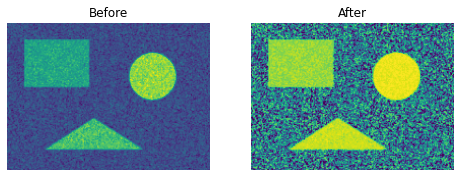

In [76]:
fig = plt.figure(figsize=(8, 6))
rows = 1
columns = 2

picc=filesetup('thirdimg.png')
fig.add_subplot(rows, columns, 1)
plt.imshow(picc)
plt.axis('off')
plt.title("Before")

npicc=histogram_equalization(picc)
fig.add_subplot(rows, columns, 2)
plt.imshow(npicc)
plt.axis('off')
plt.title("After")
plt.show()


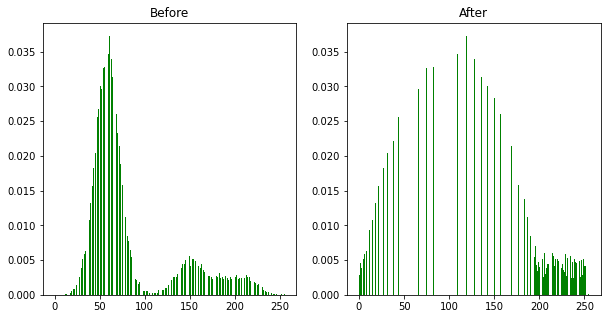

In [77]:
histo=drawhisto(picc)
histoafter=drawhisto(npicc)

fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 2


fig.add_subplot(rows, columns, 1)
plt.bar(histo.keys(), histo.values(), color='g')
plt.title("Before")

fig.add_subplot(rows, columns, 2)
plt.bar(histoafter.keys(), histoafter.values(), color='g')
plt.title("After")
plt.show()


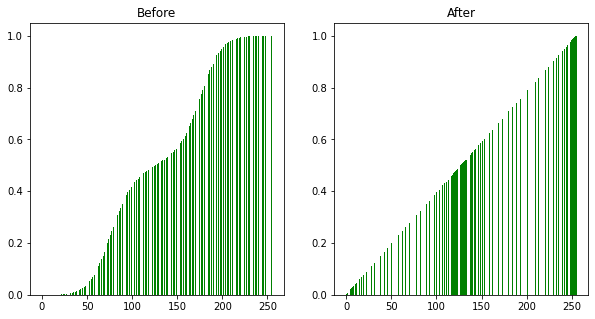

In [33]:
histo=drawcdf(histo)
histoafter=drawcdf(histoafter)

fig = plt.figure(figsize=(10,5 ))
rows = 1
columns = 2


fig.add_subplot(rows, columns, 1)
plt.bar(histo.keys(), histo.values(), color='g')
plt.title("Before")

fig.add_subplot(rows, columns, 2)
plt.bar(histoafter.keys(), histoafter.values(), color='g')
plt.title("After")
plt.show()

After Correcting the image - re-applying the histogram equalization

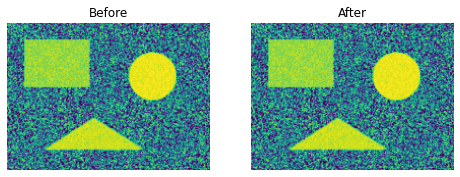

In [24]:
fig = plt.figure(figsize=(8, 6))
rows = 1
columns = 2


fig.add_subplot(rows, columns, 1)
plt.imshow(npicc)
plt.axis('off')
plt.title("Before")

renpicc=histogram_equalization(npicc)
fig.add_subplot(rows, columns, 2)
plt.imshow(renpicc)
plt.axis('off')
plt.title("After")
plt.show()

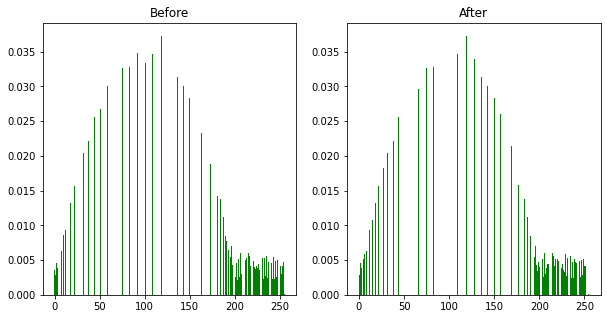

In [25]:
histo=drawhisto(npicc)
histoafter=drawhisto(renpicc)

fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 2


fig.add_subplot(rows, columns, 1)
plt.bar(histo.keys(), histo.values(), color='g')
plt.title("Before")

fig.add_subplot(rows, columns, 2)
plt.bar(histoafter.keys(), histoafter.values(), color='g')
plt.title("After")
plt.show()

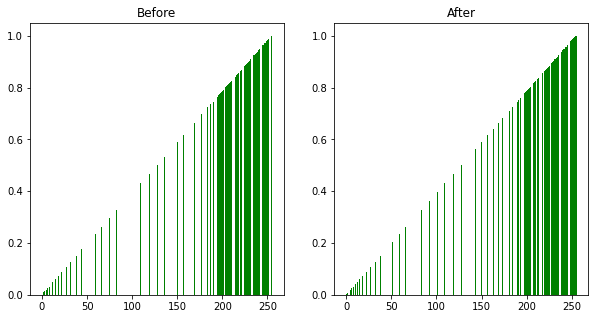

In [26]:
histo=drawcdf(histo)
histoafter=drawcdf(histoafter)

fig = plt.figure(figsize=(10,5 ))
rows = 1
columns = 2


fig.add_subplot(rows, columns, 1)
plt.bar(histo.keys(), histo.values(), color='g')
plt.title("Before")

fig.add_subplot(rows, columns, 2)
plt.bar(histoafter.keys(), histoafter.values(), color='g')
plt.title("After")
plt.show()

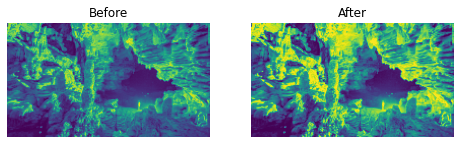

In [27]:
fig = plt.figure(figsize=(8, 6))
rows = 1
columns = 2

picc=filesetup('cave.jpg')
fig.add_subplot(rows, columns, 1)
plt.imshow(picc)
plt.axis('off')
plt.title("Before")

npicc=histogram_equalization(picc)
fig.add_subplot(rows, columns, 2)
plt.imshow(npicc)
plt.axis('off')
plt.title("After")
plt.show()

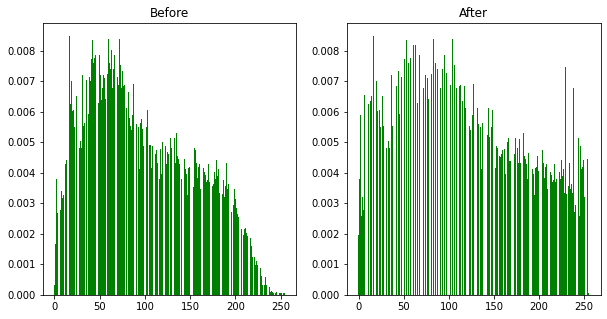

In [28]:
histo=drawhisto(picc)
histoafter=drawhisto(npicc)

fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 2


fig.add_subplot(rows, columns, 1)
plt.bar(histo.keys(), histo.values(), color='g')
plt.title("Before")

fig.add_subplot(rows, columns, 2)
plt.bar(histoafter.keys(), histoafter.values(), color='g')
plt.title("After")
plt.show()

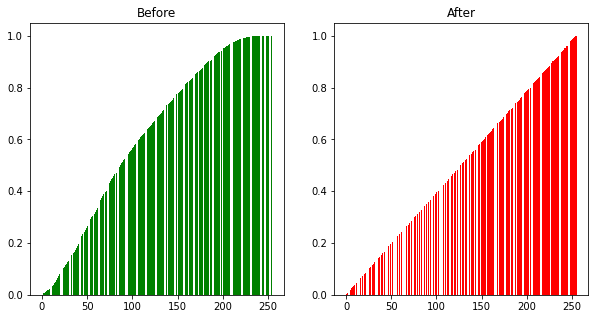

In [29]:
histo=drawcdf(histo)
histoafter=drawcdf(histoafter)

fig = plt.figure(figsize=(10,5 ))
rows = 1
columns = 2


fig.add_subplot(rows, columns, 1)
plt.bar(histo.keys(), histo.values(), color='g')
plt.title("Before")

fig.add_subplot(rows, columns, 2)
plt.bar(histoafter.keys(), histoafter.values(), color='r')
plt.title("After")
plt.show()

In [14]:
def manual_threshold(im_in, threshold):# Threshold image with the threshold of your choice
    #print(im_in)

    (row,col)=im_in.shape[:2]
    
    histo={}
    for i in range (row):
        for j in range(col):
            if im_in[i][j] not in histo:
                histo[im_in[i][j]]=1
            else:
                histo[im_in[i][j]]+=1
    
    
#     plt.bar(histo.keys(), histo.values(), color='g')
    
    temp=np.zeros_like(im_in).astype('uint8')
    
    for i in range(0,row):
        for j in range(0,col):
            if im_in[i][j]>=threshold:
                temp[i][j]=117
            else:
                temp[i][j]=0
                
    manual_thresh_img=temp
    return manual_thresh_img


def imgconversion(im_in,threshold):
    temp=np.zeros_like(im_in).astype('uint8')
    (row,col)=im_in.shape[:2]
    
    for i in range(0,row):
        for j in range(0,col):
            if im_in[i][j]>=threshold:
                temp[i][j]=117
            else:
                temp[i][j]=0
                
    return temp
    

def otsu_threshold(im_in):# Create Otsu thresholded image
    
    
    
    (row,col)=im_in.shape[:2]
    
    histo=np.zeros(256, dtype ="float32")
    
    n=row*col #total pixel
    
    for i in range (row):
        for j in range(col):
            histo[im_in[i][j]]+=1
            
    hispdf=histo/n ##histo probability 
            
    index=0 ##threshold
    mini=float('inf')  ##interclass variance
    val=0
    
    
    maxi=float('-inf')
    interindex=0
    
    variance={}
            
    for i in range(256):
                w0weight=0
                w0mean=0.00
                w0variance=0.00
                
                for k in range(0,i):
                    w0weight+=hispdf[k]
    
                ##get mean for w0
                for k in range(0,i):
                    w0mean+=k*hispdf[k]/w0weight
                         
                ##get variance for w0
                for k in range(0,i):
                    w0variance+=((k-w0mean)*(k-w0mean))*(hispdf[k]/w0weight)
                
                
                w1weight=0
                w1mean=0.00
                w1variance=0.00                
                
                for k in range(i,256):
                    w1weight+=hispdf[k]
    
                ##get mean for w1
                for k in range(i,256):
                    w1mean+=k*hispdf[k]/w1weight
                         
                ##get variance for w1
                for k in range(i,256):
                    w1variance+=((k-w1mean)*(k-w1mean))*(hispdf[k]/w1weight)
                
                #minimizing intra-class
                withinclass=w0weight*w0variance+w1weight*w1variance
                betweenclass=w0weight*(w1weight)*((w0mean-w1mean)*(w0mean-w1mean))
                
                #val=withinclass+betweenclass
                val=withinclass
                
                if val<mini:
                    mini=val
                    index=i
                if betweenclass>maxi:
                    maxi=betweenclass
                    interindex=i
                if i not in variance:
                    variance[i]=betweenclass
                    

    print("threshold(intraclass) is:",index)
    print("threshold(interclass) is:",interindex)
    otsu_thresh_img=imgconversion(im_in,index)
    
    
    return otsu_thresh_img, variance

threshold(intraclass) is: 116
threshold(interclass) is: 116


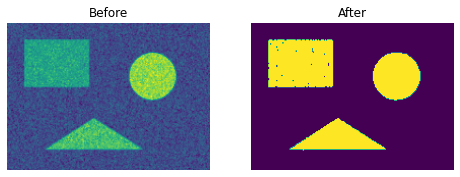

In [64]:
fig = plt.figure(figsize=(8, 6))
rows = 1
columns = 2

picc=filesetup('thirdimg.png')
fig.add_subplot(rows, columns, 1)
plt.imshow(picc)
plt.axis('off')
plt.title("Before")

npicc, variance=otsu_threshold(picc)
fig.add_subplot(rows, columns, 2)
plt.imshow(npicc)
plt.axis('off')
plt.title("After")
plt.show()

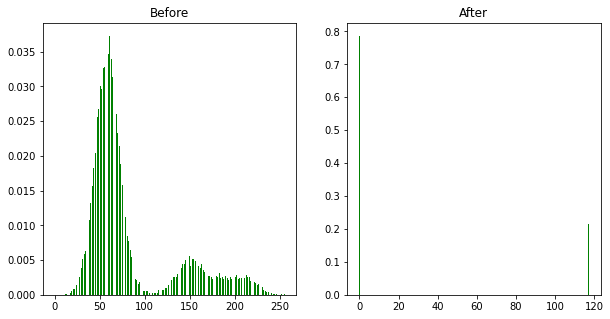

In [65]:
histo=drawhisto(picc)
histoafter=drawhisto(npicc)

fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 2


fig.add_subplot(rows, columns, 1)
plt.bar(histo.keys(), histo.values(), color='g')
plt.title("Before")

fig.add_subplot(rows, columns, 2)
plt.bar(histoafter.keys(), histoafter.values(), color='g')
plt.title("After")
plt.show()

<BarContainer object of 256 artists>

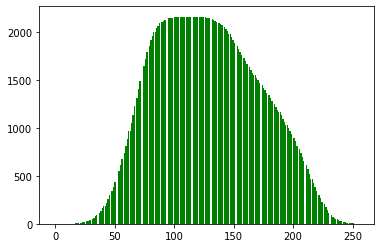

In [66]:
plt.bar(variance.keys(), variance.values(), color='g')

In [67]:
print(variance[84])

2000.7539551074135


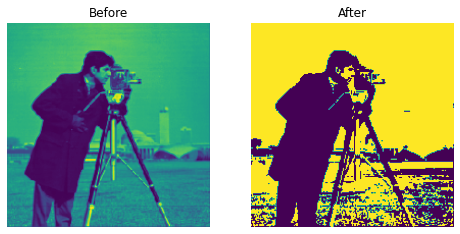

In [68]:
fig = plt.figure(figsize=(8, 6))
rows = 1
columns = 2

picc=filesetup('a2_a.png')
fig.add_subplot(rows, columns, 1)
plt.imshow(picc)
plt.axis('off')
plt.title("Before")

npicc=manual_threshold(picc,121)
fig.add_subplot(rows, columns, 2)
plt.imshow(npicc)
plt.axis('off')
plt.title("After")
plt.show()

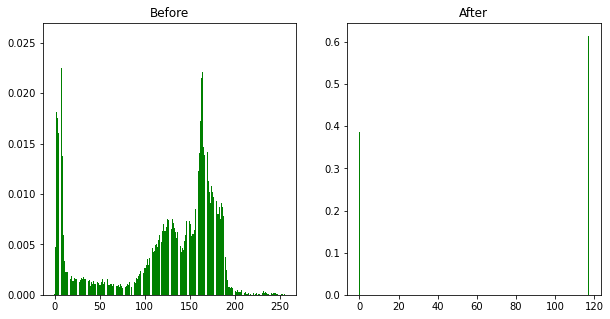

In [69]:
histo=drawhisto(picc)
histoafter=drawhisto(npicc)

fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 2


fig.add_subplot(rows, columns, 1)
plt.bar(histo.keys(), histo.values(), color='g')
plt.title("Before")

fig.add_subplot(rows, columns, 2)
plt.bar(histoafter.keys(), histoafter.values(), color='g')
plt.title("After")
plt.show()

In [70]:
#col 9
#row 8 

ig=[
    [0,0,0,0,0,0,0,0,0],
    [0,1,1,0,1,1,1,0,0],
    [0,0,0,0,1,1,1,1,0],
    [0,0,1,0,1,1,1,1,0],
    [0,0,1,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,1,0],
    [0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0]
]

In [71]:
print(len(ig))
print(len(ig[0]))

8
9


In [72]:
import scipy

In [73]:
from scipy.signal import medfilt2d

In [74]:
e=medfilt2d(ig,kernel_size=3)

In [75]:
print(e)

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0]
 [0 0 0 1 1 1 1 1 0]
 [0 0 0 0 0 1 1 0 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
